Train on 460 samples, validate on 153 samples
Epoch 1/100
460/460 [==============================] - 3s 6ms/step - loss: 4.9957 - acc: 0.5804 - val_loss: 2.7665 - val_acc: 0.6732
Epoch 2/100
460/460 [==============================] - 0s 91us/step - loss: 4.7340 - acc: 0.5457 - val_loss: 2.9176 - val_acc: 0.6405
Epoch 3/100
460/460 [==============================] - 0s 71us/step - loss: 4.5293 - acc: 0.5326 - val_loss: 2.8120 - val_acc: 0.6536
Epoch 4/100
460/460 [==============================] - 0s 80us/step - loss: 4.3701 - acc: 0.5674 - val_loss: 2.6420 - val_acc: 0.6863
Epoch 5/100
460/460 [==============================] - 0s 78us/step - loss: 4.2343 - acc: 0.6000 - val_loss: 2.5199 - val_acc: 0.7124
Epoch 6/100
460/460 [==============================] - 0s 85us/step - loss: 4.1917 - acc: 0.6109 - val_loss: 2.4771 - val_acc: 0.7190
Epoch 7/100
460/460 [==============================] - 0s 78us/step - loss: 4.1464 - acc: 0.6152 - val_loss: 2.4933 - val_acc: 0.7255
Epoch 8/100
460/4

460/460 [==============================] - 0s 97us/step - loss: 0.6624 - acc: 0.6826 - val_loss: 0.5962 - val_acc: 0.7647
Epoch 62/100
460/460 [==============================] - 0s 85us/step - loss: 0.6593 - acc: 0.6826 - val_loss: 0.5852 - val_acc: 0.7516
Epoch 63/100
460/460 [==============================] - 0s 121us/step - loss: 0.6601 - acc: 0.6826 - val_loss: 0.5788 - val_acc: 0.7451
Epoch 64/100
460/460 [==============================] - 0s 48us/step - loss: 0.6493 - acc: 0.6804 - val_loss: 0.5881 - val_acc: 0.7451
Epoch 65/100
460/460 [==============================] - 0s 91us/step - loss: 0.6501 - acc: 0.6739 - val_loss: 0.5706 - val_acc: 0.7516
Epoch 66/100
460/460 [==============================] - 0s 63us/step - loss: 0.6479 - acc: 0.6870 - val_loss: 0.5707 - val_acc: 0.7516
Epoch 67/100
460/460 [==============================] - 0s 74us/step - loss: 0.6528 - acc: 0.6652 - val_loss: 0.6075 - val_acc: 0.7059
Epoch 68/100
460/460 [==============================] - 0s 76us/ste

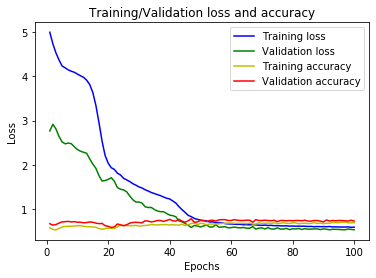

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 5         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [4]:
#0. 사용할 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

#랜덤시드 고정시키기
np.random.seed(5)

#1. 데이터 준비하기
dataset = pd.read_csv('diabetes2.csv')
dataset = dataset.values

#2. 데이터셋 분할
X = dataset[:,:8]
Y = dataset[:,8]

def division(data):
    train_size = int(len(data)*0.6)
    val_size = int(len(data)*0.8)
    data_train = data[0:train_size]
    data_val = data[train_size:val_size]
    data_test = data[val_size:len(data)]
    return data_train, data_val, data_test

X_train, X_val, X_test = division(X)
Y_train, Y_val, Y_test = division(Y)

#3. 모델 구성하기
model = Sequential()
model.add(Dense(8, input_dim=8, activation ='relu'))
model.add(Dense(8, activation ='relu'))
model.add(Dense(4, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))

#4. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

#5. 모델 학습시키기
hist = model.fit(X_train, Y_train, epochs = 100, batch_size = 100, validation_data=(X_val, Y_val))

#6. 모델 평가하기
scores = model.evaluate(X_test, Y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))
#print(hist.history['loss'])

#epoch, loss, acc 그래프
loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['acc']
val_acc = hist.history['val_acc']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')

plt.title('Training/Validation loss and accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#7. 예측하기
#Y_predict = model.predict(X_test)
#df = pd.DataFrame(Y_predict)
#df.insert(1,'Y_test',Y_test)
#df.to_csv("predict_binary.csv")

#모델 아키텍쳐 살펴보기
model.summary()

#8. 모델 저장하기
#model.save('binary_classification.h5')

# #9. 모델 로드하기
#from keras.models import load_model
#model = load_model('binary_classification.h5')

# #9_7. 예측하기
#Y_predict = model.predict(X_test)
#Y_predict
# df = pd.DataFrame(Y_predict)
# df.insert(1,'Y_test',Y_test)
# df.to_csv("predict_binary.csv")